In [42]:
import os, time, datetime, math

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [43]:
df = pd.read_csv("regression_results.csv", sep=",")

df["model"] = df["model"].str[:-4]

df.rename(columns={"interval": "Elapsed Time",
                   "rmse": "RMSE",
                   "mae": "MAE",
                   "r2": "R^2"}, inplace=True)

df["Transformation"] = df["log"] | df["minmax"] | df["standard"] | df["pca"]

def foo(x):
    if x in ["linear","sgd"]:
        x = "Classicals"
    elif x in ["Lasso","Ridge","ElasticNet"]:
        x = "Regularizers"
    elif x in ["knn","radius_neigh"]:
        x = "Nearest Neighbours"
    elif x in ["tree","extra_tree"]:
        x = "Trees"
    elif x in ["bagging","randomforest","adaboost","xgboost","gradientboost"]:
        x = "Ensemblers"
    elif x in ["svr","svr_linear"]:
        x = "Support Vector Machines"
    elif x in ["mlp"]:
        x = "Neural Networks"
    return x
    
df["Family"] = df["model"].apply(foo)

df.tail(5)

,model,description,MAE,RMSE,R^2,cv,features,n_features,multi,poly,poly_dreg,log,minmax,standard,pca,pca_per,Elapsed Time,date,Transformation,Family
50,mlp,hidlay50actReluSolverAdam,12.97,16.89,17.41,10,Age-Cervical-Weight-Height-BMI-Gender_hombre,6,True,False,2,False,True,False,False,0.8,0.8364,2019-10-29_16:04:17,True,Neural Networks
51,mlp,hidlay30-10actReluSolverAdam,12.74,16.88,17.49,10,Age-Cervical-Weight-Height-BMI-Gender_hombre,6,True,False,2,False,True,False,False,0.8,0.4246,2019-10-29_16:06:07,True,Neural Networks
52,sgd,lossSquaredRegL2,13.38,17.34,12.89,10,Age-Cervical-Weight-Height-BMI-Gender_hombre,6,True,False,2,False,True,False,False,0.8,0.0145,2019-10-29_16:14:06,True,Classicals
53,sgd,lossEpsilonRegL2,12.54,16.87,17.58,10,Age-Cervical-Weight-Height-BMI-Gender_hombre,6,True,False,2,False,True,False,False,0.8,0.0103,2019-10-29_16:17:56,True,Classicals
54,sgd,lossEpsilonRegL2,13.00,17.98,6.34,10,Age-Cervical-Weight-Height-BMI-Gender_hombre,6,True,False,2,False,True,False,False,0.8,0.0115,2019-10-29_16:18:15,True,Classicals


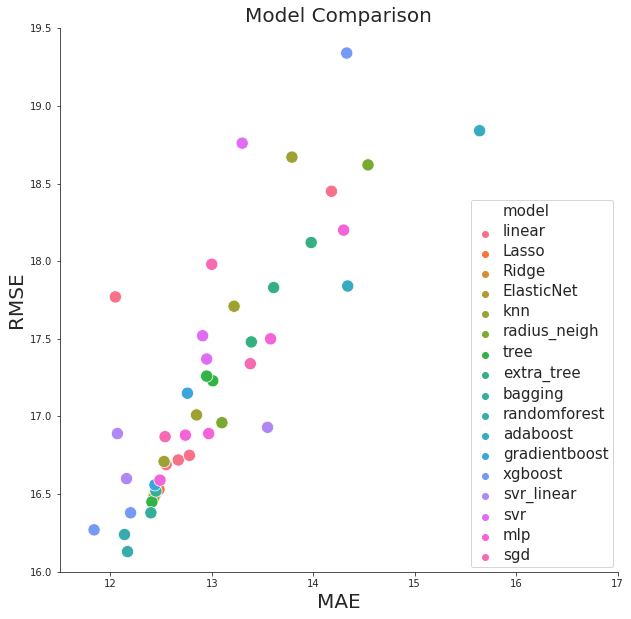

In [54]:
x = "MAE"
y = "RMSE"
hue = "model"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                #palette="Set1",
                s=150)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set(ylim=(16, 19.5), 
       xlim=(11.5,17))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='25') # for legend title
sns.despine()

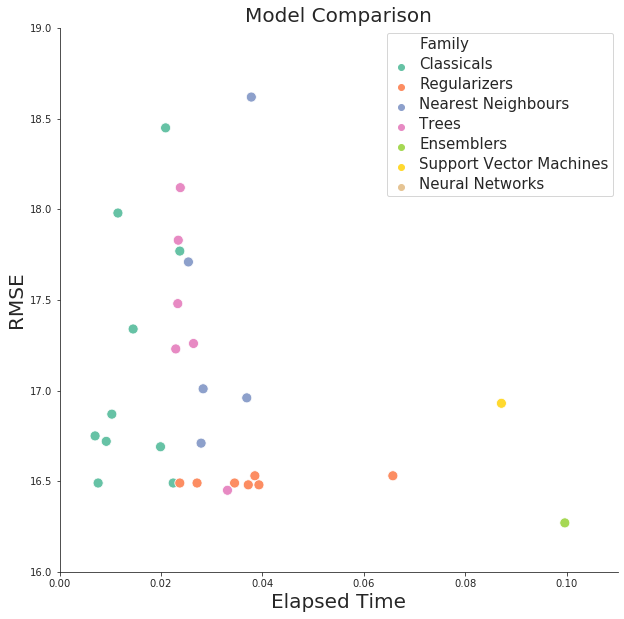

In [45]:
x = "Elapsed Time"
y = "RMSE"
hue = "Family"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="Set2",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set(ylim=(16, 19), 
       xlim=(0,0.11))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text


sns.despine()

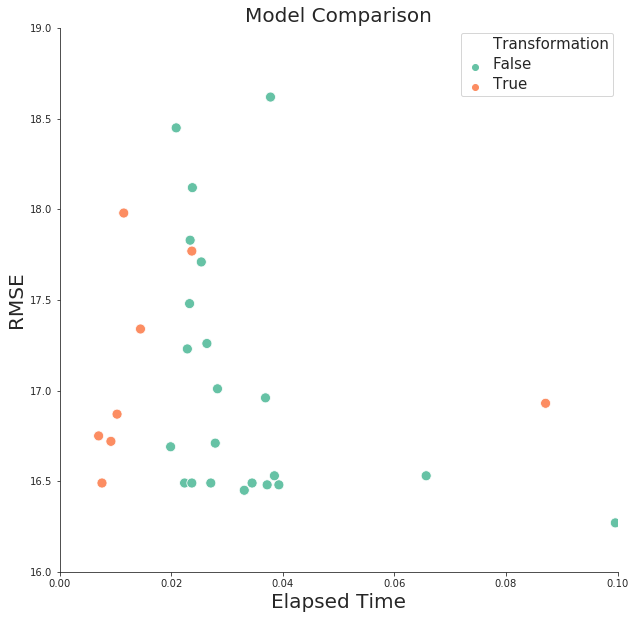

In [55]:
x = "Elapsed Time"
y = "RMSE"
hue = "Transformation"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="Set2",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set(ylim=(16, 19), 
       xlim=(0,0.1))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text


sns.despine()

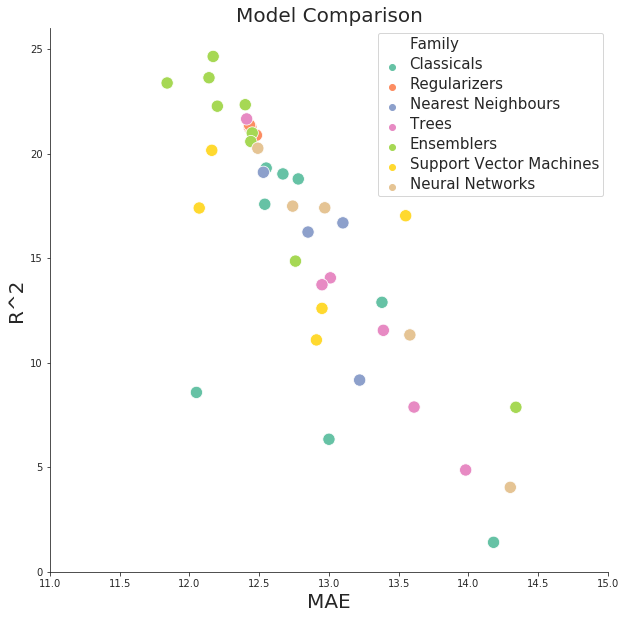

In [47]:
x = "MAE"
y = "R^2" #try without limiting the axes
hue = "Family"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="Set2",
                s=150,
                )

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set(ylim=(0, 26), 
       xlim=(11,15)
      )
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

sns.despine()

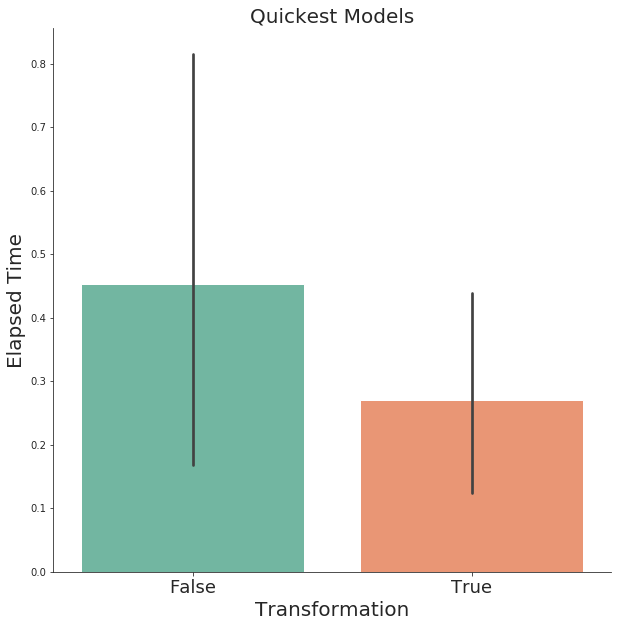

In [48]:
x = "Transformation"
y = "Elapsed Time"
df_sorted = df.sort_values(y,ascending=True)
df_sorted["model-desc"] = df_sorted["model"]+"-"+ df_sorted["description"]


plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.barplot(x=x,
                 y=y,
                 data=df,
                 palette="Set2",
                 #hue="Transformation"
                 )

ax.set_title('Quickest Models', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set_xticklabels(ax.get_xmajorticklabels(),rotation=0, fontsize=18)
sns.despine()
plt.show()

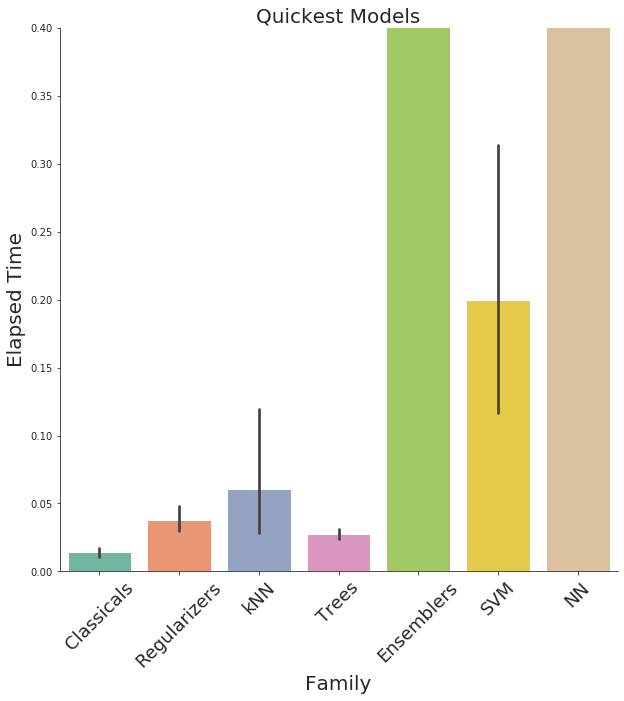

In [50]:
x = "Family"
y = "Elapsed Time"
df_sorted = df.sort_values(y,ascending=True)
df_sorted["model-desc"] = df_sorted["model"]+"-"+ df_sorted["description"]


plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.barplot(x=x,
                 y=y,
                 data=df,
                 palette="Set2",
                 #hue="Transformation"
                 )

ax.set_title('Quickest Models', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set_xticklabels(["Classicals", "Regularizers", "kNN", "Trees", "Ensemblers", "SVM", "NN"],rotation=45, fontsize=18)
ax.set_ylim(0,0.4)
sns.despine()
plt.show()